### Considere uma função densidade de probabilidade (fdp) Normal bidimensional $f_{x, y}(X, Y)$, com médias $m_x = 5$, $m_y = 3$ e matriz de covariância

$P = \begin{bmatrix}
\sigma_1^2 & \rho \sigma_1 \sigma_2\\
\rho \sigma_1 \sigma_2 & \sigma_2^2
\end{bmatrix} = \begin{bmatrix}
4 & 1.8\\
1.8 & 1
\end{bmatrix}$

### Gere 100.000 amostras para essa distribuição. Então:

$\sigma_1^2 = 4 \rightarrow \sigma_1 = 2$

$\sigma_2^2 = 4 \rightarrow \sigma_2 = 1$

$\rho \sigma_1 \sigma_2 = 1.8 \rightarrow \rho = 0.9$

In [1]:
import numpy as np

import plotly.graph_objects as go
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
N_SAMPLES = 100000

mx = 5
my = 3

P = np.array([
  [4.0, 1.8],
  [1.8, 1.0]
])

np.random.seed(42)

#### a) Plote o Gráfico 3D de $f_{x, y}(X, Y)$

In [3]:
x = stats.norm.rvs(size=N_SAMPLES, loc=mx, scale=2)
y = stats.norm.rvs(size=N_SAMPLES, loc=my, scale=1)

x_grid = np.linspace(mx - 5, mx + 5, 100)
y_grid = np.linspace(my - 5, my + 5, 100)

X, Y = np.meshgrid(x_grid, y_grid)

Z = np.zeros_like(X)

for i in range(len(x_grid)):
  for j in range(len(y_grid)):
    xy = np.array([X[i, j], Y[i, j]])
    Z[i, j] = (1 / (2 * np.pi * np.sqrt(np.linalg.det(P)))) * np.exp(-0.5 * np.dot(np.dot((xy - [mx, my]).T, np.linalg.inv(P)), (xy - [mx, my])))

fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])

fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='f(X, Y)'))

fig.show()

#### b) Plote as superfícies de níveis de de $f_{x, y}(X, Y)$

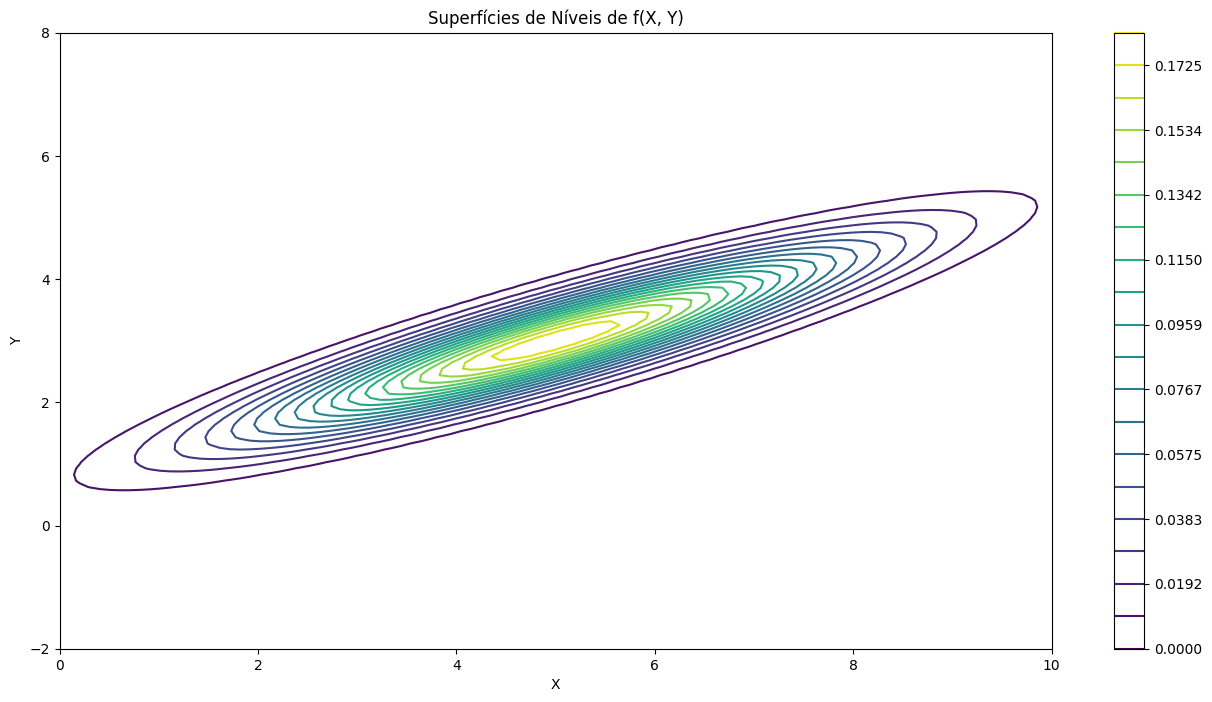

In [4]:
fig, ax = plt.subplots(figsize=(16, 8))

plt.contour(X, Y, Z, levels=np.linspace(0, np.max(Z), 20), cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Superfícies de Níveis de f(X, Y)')

plt.colorbar()
plt.show()

#### c) Compare os resultados obtidos nos itens anteriores com os da questão 1.j.

In [5]:
SAMPLE_SIZE = 5000

In [6]:
x_1j = stats.norm.rvs(size=SAMPLE_SIZE, loc=0, scale=1)
y_1j = stats.norm.rvs(size=SAMPLE_SIZE, loc=0, scale=1)

theta = np.pi / 4

w = np.cos(theta) * (2 * x_1j) - np.sin(theta) * (y_1j) + 5
z = np.sin(theta) * (2 * x_1j) + np.cos(theta) * (y_1j) + 3

mean_w = np.mean(w)
mean_z = np.mean(z)

cov_wz = np.mean((w - mean_w) * (z - mean_z))

std_w = np.std(w)
std_z = np.std(z)

corr_wz = cov_wz - (mean_w * mean_z)

ro = cov_wz / (std_w * std_z)

print(f'Covariância entre w e z: {cov_wz:.4f}')
print(f'Correlação entre w e z: {corr_wz:.4f}')
print(f'Coeficiente de correlação (ρ) entre w e z: {ro:.4f}')

Covariância entre w e z: 1.5099
Correlação entre w e z: -13.2914
Coeficiente de correlação (ρ) entre w e z: 0.5985


In [7]:
cov_xy = np.mean((x - mx) * (y - my))

std_x = np.std(x)
std_y = np.std(y)

corr_xy = cov_xy - (mx * my)

rho_xy = cov_xy / (std_x * std_y)

print(f'Covariância entre x e y: {cov_xy:.4f}')
print(f'Correlação entre x e y: {corr_xy:.4f}')
print(f'Coeficiente de correlação (ρ) entre x e y: {rho_xy:.4f}')

Covariância entre x e y: 0.0126
Correlação entre x e y: -14.9874
Coeficiente de correlação (ρ) entre x e y: 0.0063


#### d) Ajuste os valores de P para gerar um resultado similar ao do item 1.k.

In [8]:
x = stats.norm.rvs(size=5000, loc=0, scale=1)
y = stats.norm.rvs(size=5000, loc=0, scale=1)

theta = 3 * np.pi / 4

w = np.cos(theta) * (2 * x) - np.sin(theta) * (y) + 5
z = np.sin(theta) * (2 * x) + np.cos(theta) * (y) + 3

mean_w = np.mean(w)
mean_z = np.mean(z)

cov_wz = np.mean((w - mean_w) * (z - mean_z))

std_w = np.std(w)
std_z = np.std(z)

corr_wz = cov_wz - (mean_w * mean_z)

ro = cov_wz / (std_w * std_z)

print(f'Covariância entre w e z: {cov_wz}')
print(f'Correlação entre w e z: {corr_wz}')
print(f'Coeficiente de correlação Rô: {ro}')

Covariância entre w e z: -1.483179842378963
Correlação entre w e z: -16.461332191145896
Coeficiente de correlação Rô: -0.6037257981532534


In [9]:
data = np.vstack((w, z))

cov_matrix = np.cov(data)

print("Cov(W, Z):\n")
print(cov_matrix)

Cov(W, Z):

[[ 2.42051742 -1.48347654]
 [-1.48347654  2.49444356]]


In [10]:
mx = 5
my = 3

P = cov_matrix

x = np.linspace(mx - 5, mx + 5, 100)
y = np.linspace(my - 5, my + 5, 100)

X, Y = np.meshgrid(x, y)

Z = np.zeros_like(X)

for i in range(len(x)):
  for j in range(len(y)):
    xy = np.array([X[i, j], Y[i, j]])

    Z[i, j] = (1 / (2 * np.pi * np.sqrt(np.linalg.det(P)))) * np.exp(-0.5 * np.dot(np.dot((xy - [mx, my]).T, np.linalg.inv(P)), (xy - [mx, my])))

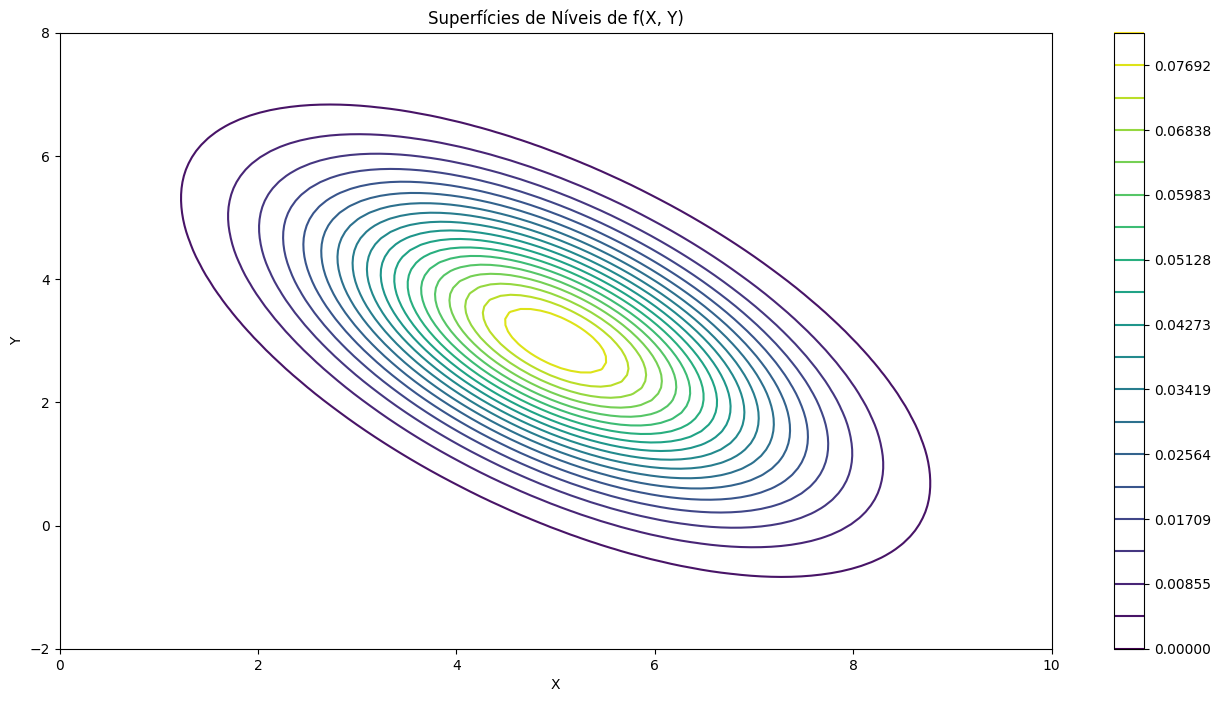

In [11]:
fig, ax = plt.subplots(figsize=(16, 8))

plt.contour(X, Y, Z, levels=np.linspace(0, np.max(Z), 20), cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Superfícies de Níveis de f(X, Y)')

plt.colorbar()
plt.show()